In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There are no null values in dataframe

# Visualizations

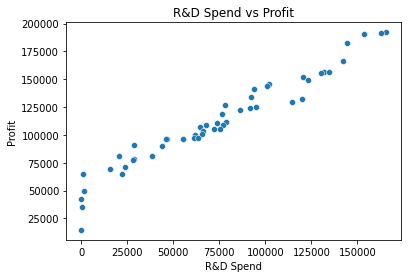

In [6]:
sns.scatterplot(df["R&D Spend"],df['Profit'])
plt.title("R&D Spend vs Profit")
plt.show()

There is Positive relation between R&d spend and Profit 

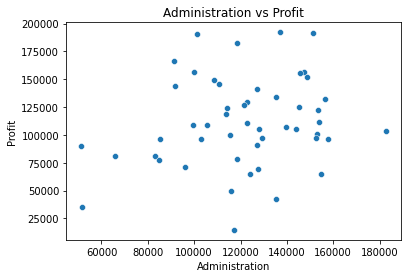

In [7]:
sns.scatterplot(df["Administration"],df['Profit'])
plt.title("Administration vs Profit")
plt.show()

There is no relation between Administration and Profit

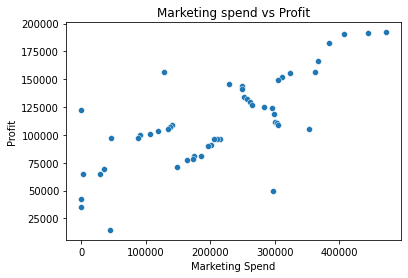

In [8]:
sns.scatterplot(df["Marketing Spend"],df['Profit'])
plt.title("Marketing spend vs Profit")
plt.show()

There is positive relationship between Marketing spend and Profit

In [9]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
statewise_profit=df.groupby("State")['Profit'].sum()
statewise_profit

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

<AxesSubplot:xlabel='State', ylabel='Profit'>

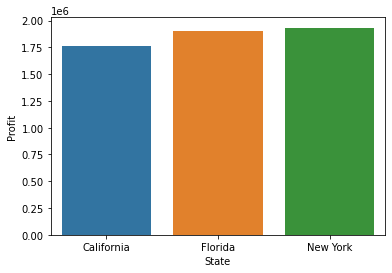

In [11]:
sns.barplot(statewise_profit.index,statewise_profit)

There is highest profit in New york city

# Modelling

In [12]:
X=df[['R&D Spend']]
y=df['Profit']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
se=StandardScaler()

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
reg=LinearRegression()

In [19]:
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_train=reg.predict(X_train)

In [21]:
y_pred_test=reg.predict(X_test)

Text(0.5, 1.0, 'R&D Spend vs Profit')

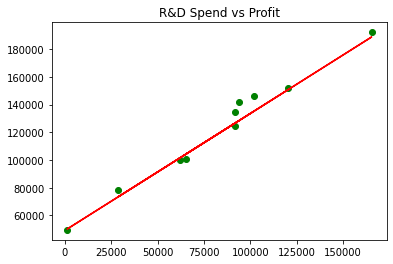

In [22]:
plt.scatter(X_test,y_test,color='green') #Actual Values
plt.plot(X_test,y_pred_test,color='red') #predicted Values
plt.title("R&D Spend vs Profit")

Text(0.5, 1.0, 'R&D Spend vs Profit')

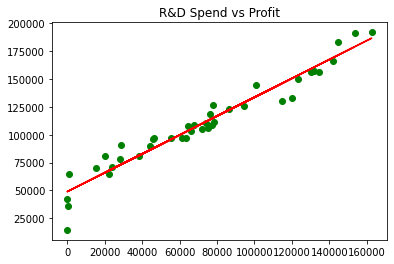

In [23]:
plt.scatter(X_train,y_train,color='green') #Actual Values
plt.plot(X_train,y_pred_train,color='red') #predicted Values
plt.title("R&D Spend vs Profit")

In [24]:
from sklearn import metrics

In [25]:
print("Train Data")
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
print("R2 Score:",metrics.r2_score(y_train,y_pred_train))

Train Data
RMSE: 9846.127651390269
R2 Score: 0.9387391481701634


In [26]:
print("Test Data")
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))
print("R2 Score:",metrics.r2_score(y_test,y_pred_test))

Test Data
6392.704610960791
R2 Score: 0.9728849912273875


In [27]:
reg.coef_

array([0.8453958])

In [28]:
reg.intercept_

49020.86995972914

In [30]:
# 150000 R&d spend 
reg.predict([[150000]])[0]

175830.23943542302